<a href="https://colab.research.google.com/github/chandrugunaruthvi/hello-world/blob/main/Questions_AIML_Online_Project_1_Advanced_Computer_Vision_Face_Mask_Prediction_using_U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [2]:
import numpy as np
#data = #### Add your code here ####

In [3]:
import os
os.chdir('/content/drive/My Drive/AIML/Facemask segmentation/')
path = '.'

In [4]:
#!unzip "/content/drive/My Drive/images.npy.zip" -d "/content/drive/My Drive/AIML/Facemask segmentation/FMS"

In [5]:
#For simplicity we have added the required code here.
#from zipfile import ZipFile

#path_to_zip_file = '/content/drive/My Drive/images.npy.zip'
#with ZipFile(path_to_zip_file, 'r') as zf:
#  zf.extractall()

In [6]:
pwd

'/content/drive/My Drive/AIML/Facemask segmentation'

In [7]:
project_path = "/content/drive/My Drive/AIML/Facemask segmentation"

In [8]:
original  = os.listdir("/content/drive/My Drive/AIML/Facemask segmentation")

In [9]:
print(original)

['FMS', 'images.npy', 'model-0.97.h5', 'model-1.07.h5', 'model-0.99.h5', 'model-0.53.h5', 'model-8.76.h5', 'model-1.02.h5', 'model-1.01.h5', 'model-1.20.h5', 'model-1.32.h5', 'model-1.29.h5', 'model-0.85.h5', 'model-1.13.h5', 'model-1.26.h5', 'model-0.91.h5', 'model-0.81.h5', 'model-0.95.h5', 'model-1.05.h5', 'model-0.94.h5', 'model--1.39.h5', 'model--1.60.h5', 'model--1.72.h5', 'model--1.97.h5', 'model--2.02.h5', 'model--2.27.h5', 'model--2.43.h5', 'model--2.66.h5', 'model--2.77.h5', 'model--3.35.h5', 'model--0.75.h5', 'model--2.28.h5', 'model--3.83.h5', 'model--11.94.h5', 'model--11.95.h5', 'model-0.83.h5', 'model-0.79.h5', 'model-0.72.h5', 'Photo1.jpg', 'Photo2.jpg', 'Photo3.jpg', 'Photo4.jpg', 'Photo5.jpg', 'model-0.80.h5', 'a_Original_Image.png', 'b_Original_Mask.png', 'a_Original_Image.jpg', '3_Original_Image.jpg', '1_Original_Image.jpg', '2_Original_Image.jpg']


In [10]:
data = np.load('images.npy',allow_pickle=True)

In [11]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [12]:
#### Add your code here ####
print (data[20][0]) # Images

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [13]:
print (data[20][1]) # Face bounding box coordinates & Sizes

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.4979166666666667, 'y': 0.20833333333333334}, {'x': 0.7854166666666667, 'y': 0.6888888888888889}], 'imageWidth': 480, 'imageHeight': 360}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [14]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224


### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [15]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

In [16]:
X.shape, masks.shape

((409, 224, 224, 3), (409, 224, 224))

In [17]:
from sklearn.model_selection import train_test_split

# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, masks, test_size=0.02, random_state=42)

In [18]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((400, 224, 224, 3), (9, 224, 224, 3), (400, 224, 224), (9, 224, 224))

Training data

In [19]:
#X_train = preprocess_input(X_train)
#y_train = preprocess_input(y_train)

Testing data

In [20]:
#X_valid = preprocess_input(X_valid)
#y_valid = preprocess_input(y_valid)

In [21]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((400, 224, 224, 3), (9, 224, 224, 3), (400, 224, 224), (9, 224, 224))

### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.52156866  0.53725493  0.23921573]
  [-0.32549018 -0.25490195 -0.24705881]
  [-0.00392157  0.06666672  0.06666672]
  ...
  [ 0.5529412   0.53725493  0.21568632]
  [ 0.5529412   0.53725493  0.23921573]
  [ 0.50588238  0.50588238  0.11372554]]

 [[ 0.51372552  0.51372552  0.30196083]
  [-0.30196077 -0.23137254 -0.2235294 ]
  [ 0.00392163  0.07450986  0.07450986]
  ...
  [ 0.53725493  0.52156866  0.20000005]
  [ 0.53725493  0.52941179  0.16078436]
  [ 0.52156866  0.52156866  0.12941182]]

 [[ 0.58431375  0.6156863   0.43529415]
  [-0.30196077 -0.24705881 -0.16862744]
  [-0.08235294 -0.02745098  0.05098045]
  ...
  [ 0.52941179  0.52156866  0.16078436]
  [ 0.5529412   0.5529412   0.15294123]
  [ 0.52156866  0.52156866  0.12941182]]

 ...

 [[-0.99215686 -0.98431373 -1.        ]
  [-0.97647059 -1.         -0.96078432]
  [-0.31764704 -0.34117645 -0.38039213]
  ...
  [-0.35686272 -0.41176468 -0.98431373]
  [-0.39607841 -0.47450978 -1.        ]
  [-0.38039213 -0.45098037 -0.9137255 ]]

 [

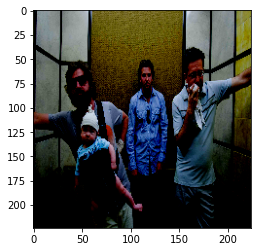

In [22]:
#### Add your code here ####
import matplotlib.pyplot as plt
n=117 # assigned index value to variable 'n' to call for printing respective image, mask and arrays
plt.imshow(X[n])
print(X[n])

Print the mask

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


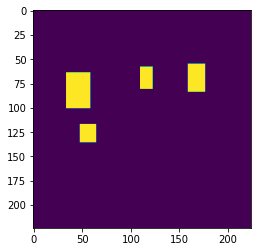

In [23]:
#### Add your code here ####
plt.imshow(masks[n])
print(masks[n])

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [24]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    #### Add your code here ####
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_3_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    #block4 = model.get_layer("conv_pw_7_relu").output
    #block5 = model.get_layer("conv_pw_9_relu").output
    block6 = model.get_layer("conv_pw_11_relu").output
    block7 = model.get_layer("conv_pw_13_relu").output

    

    x = Concatenate()([UpSampling2D()(block7), block6])
    #x = Concatenate()([UpSampling2D()(x), block5])
    #x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    #x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [25]:
#### Add your code here ####
HEIGHT_CELLS = 28
WIDTH_CELLS = 28

model = create_model(True)

### Print model summary (2 marks)

In [26]:
#### Add your code here ####
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [27]:
#### Add your code here ####
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [28]:
#### Add your code here ####
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [29]:
#### Add your code here ####
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [30]:
#### Add your code here ####
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

callbacks=(ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True), EarlyStopping(monitor="val_loss", patience=5),
           ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-8, verbose=1))

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [31]:
#### Add your code here ####
model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=60, batch_size=1, verbose=1,callbacks=callbacks)

Epoch 1/60
400/400 [==============================] - 24s 47ms/step - loss: 1.5095 - dice_coefficient: 0.4459 - val_loss: 0.8582 - val_dice_coefficient: 0.5645

Epoch 00001: val_loss improved from inf to 0.85815, saving model to model-0.86.h5
Epoch 2/60
400/400 [==============================] - 18s 46ms/step - loss: 0.8834 - dice_coefficient: 0.5988 - val_loss: 0.8882 - val_dice_coefficient: 0.5678

Epoch 00002: val_loss did not improve from 0.85815
Epoch 3/60
400/400 [==============================] - 18s 46ms/step - loss: 0.7605 - dice_coefficient: 0.6528 - val_loss: 0.8471 - val_dice_coefficient: 0.5719

Epoch 00003: val_loss improved from 0.85815 to 0.84714, saving model to model-0.85.h5
Epoch 4/60
400/400 [==============================] - 19s 46ms/step - loss: 0.5878 - dice_coefficient: 0.6837 - val_loss: 1.3502 - val_dice_coefficient: 0.5104

Epoch 00004: val_loss did not improve from 0.84714
Epoch 5/60
400/400 [==============================] - 19s 46ms/step - loss: 0.6038 - d

### Get the predicted mask for a test image   (3 marks)

Show the test image

In [32]:
#### Add your code here ####
y_pred=model.predict(X_valid)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


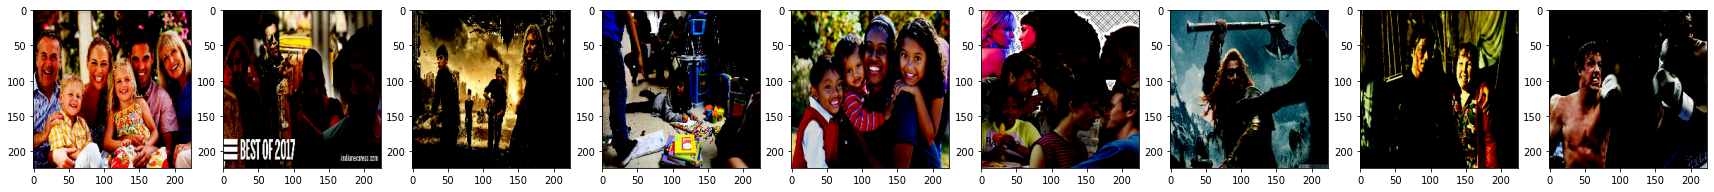

In [33]:
#### Add your code here ####
plt.figure(figsize=(30, 6))
for t in range(9):
  plt.subplot(1,9,t+1)
  plt.imshow(X_valid[t]);

Show original mask for test image

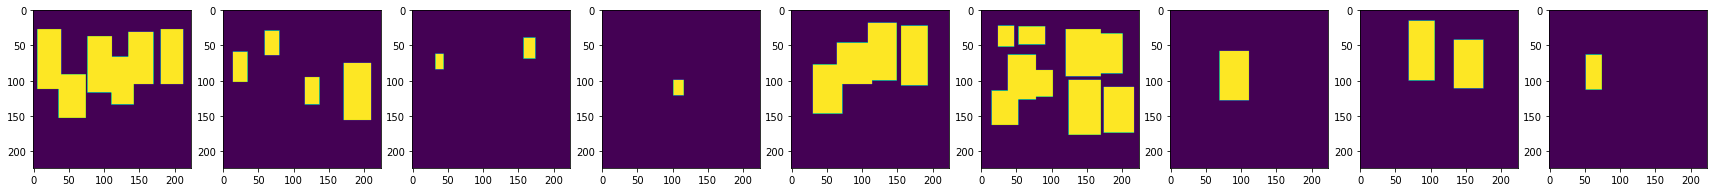

In [34]:
#### Add your code here ####
plt.figure(figsize=(30, 6))
for t in range(9):
  plt.subplot(1,9,t+1)
  plt.imshow(y_valid[t]);


Predict the mask on the test image

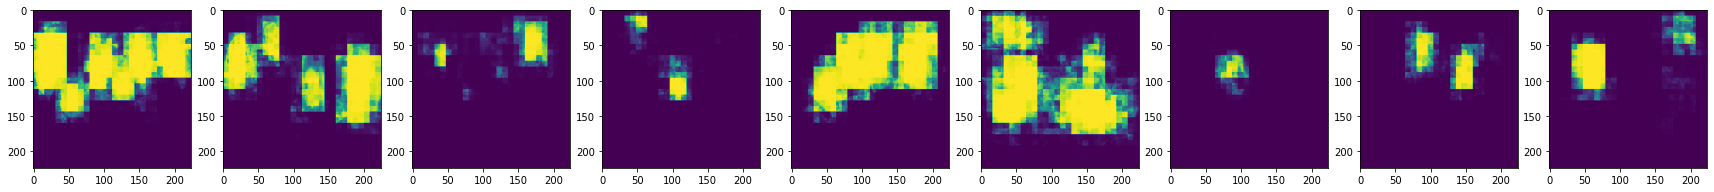

In [35]:
plt.figure(figsize=(30, 6))
for t in range(9):
  plt.subplot(1,9,t+1)
  plt.imshow(cv2.resize(y_pred[t], (224,224)))

In [36]:
def mask_parse(mask):
    mask = np.squeeze(mask)
    mask = [mask, mask, mask]
    mask = np.transpose(mask, (1, 2, 0))
    return mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


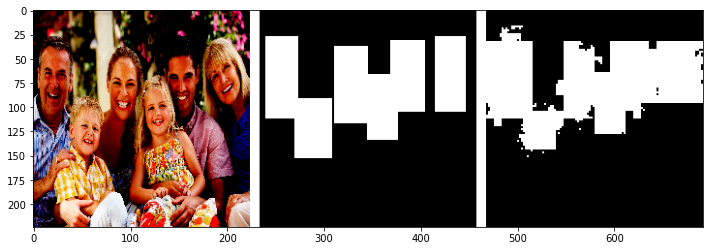

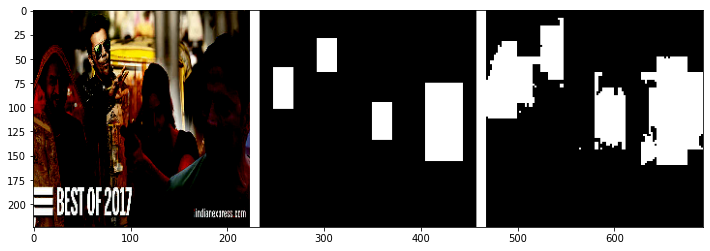

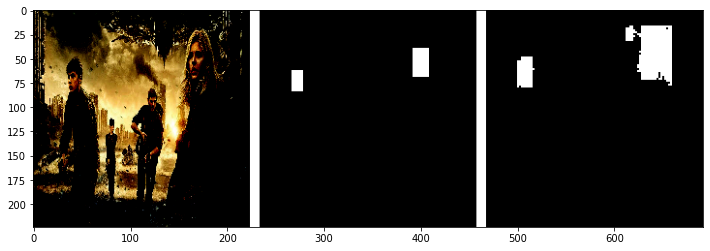

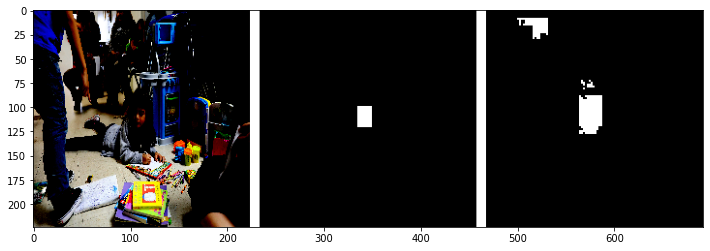

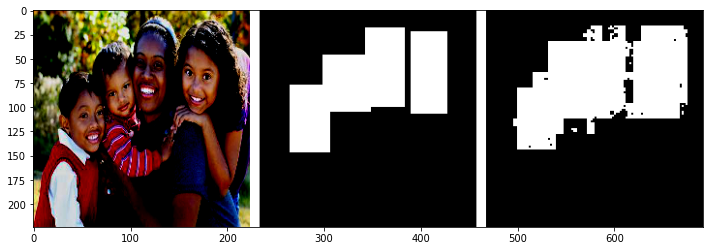

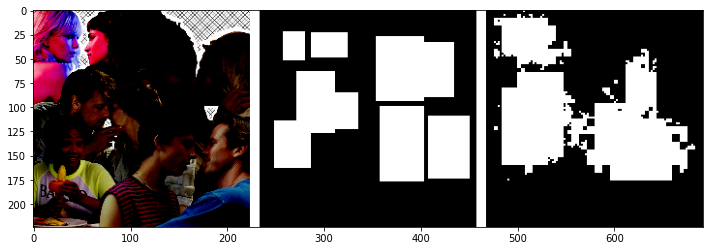

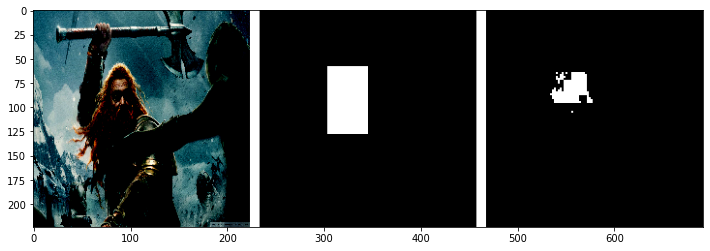

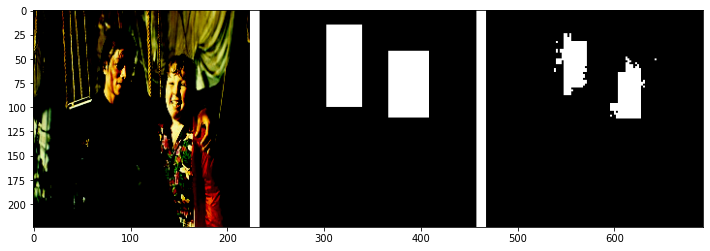

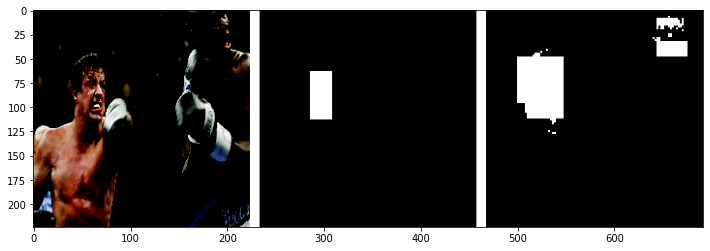

In [37]:
for i in range(9):
    x = X_valid[i]
    y = y_valid[i]
    y_pred = model.predict(np.expand_dims(x, axis=0))[0] > 0.5
    h, w, _ = x.shape
    white_line = np.ones((h, 10, 3))

    all_images = [
        x, white_line,
        mask_parse(y), white_line,
        mask_parse(y_pred)
    ]
    image = np.concatenate(all_images, axis=1)
    
    fig = plt.figure(figsize=(12, 12))
    a = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(image)

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

In [38]:
y_valid[0].shape

(224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


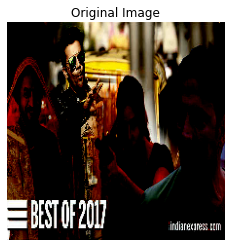

In [39]:
plt.figure()
plt.imshow(np.squeeze(X_valid[1]))
plt.axis('off')
plt.title('Original Image')
plt.savefig("2_Original_Image.jpg")

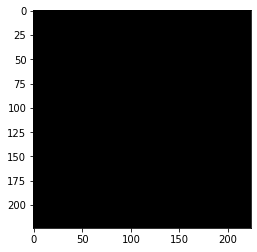

In [40]:
filename = '2_Original_Image.jpg'

unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)